# Create and Explore Simulated Data


Imagine you're working at a subscription-based streaming company like StreamNow, and your job is to help reduce customer churn using machine learning. You've created a simulated dataset that mirrors real customer behavior. Each row in the dataset represents one customer, and each column captures a specific aspect of that customer's interaction with the service. Here's what each feature means:

**Tenure:** How many months the customer has been subscribed to StreamNow. Longer tenure usually suggests loyalty, while shorter tenure might signal risk of churn.

**MonthlyCharges:** The amount the customer pays each month. Higher charges might cause dissatisfaction if not matched by perceived value.

**SupportTickets:** Number of times the customer has contacted customer support. A high number could reflect frustration or unresolved issues.

**ContractLength:** The length of the customer's current contract in months. Customers with short-term or no contracts may be more likely to churn.

**InternetUsage:** Total hours of streaming in the last month. A drop in usage can be an early warning sign of disengagement.

**NumLogins:** How many times the customer logged into their account in the last 30 days. Low login frequency can indicate reduced interest.

**StreamingHours:** Hours spent watching original content. This helps gauge engagement with premium offerings.

**PhoneUsage:** Number of times the customer used the mobile app instead of desktop. Cross-platform users tend to be more engaged.

**DeviceChanges:** How many times the customer changed or added devices on their account. Can indicate tech-savviness or issues with service usability.

**RegionScore:** A composite score reflecting regional factors like average internet speed, regional pricing, and competitor presence. Lower scores may indicate higher churn risk due to external conditions.

The **Churn** column is the target variable. It indicates whether a customer eventually canceled their subscription (1) or remained subscribed (0). This data allows you to train a predictive model to flag at-risk customers and take action before they leave.



In [ ]:
# SECTION 1: Create and Explore Simulation Data
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulate customer churn data
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=6,
    n_redundant=2, n_classes=2, weights=[0.7, 0.3], random_state=42
)

# 2. Create DataFrame with column names
feature_names = [
    "Tenure", "MonthlyCharges", "SupportTickets", "ContractLength",
    "InternetUsage", "NumLogins", "StreamingHours", "PhoneUsage",
    "DeviceChanges", "RegionScore"
]
df = pd.DataFrame(X, columns=feature_names)
df["Churn"] = y

# 3. View first few rows
df.head()


,Tenure,MonthlyCharges,SupportTickets,ContractLength,InternetUsage,NumLogins,StreamingHours,PhoneUsage,DeviceChanges,RegionScore,Churn
0,-1.030931,1.391626,0.547274,0.928932,-1.738880,1.250002,1.332551,1.578256,2.124722,-0.318434,0
1,-2.766254,1.247870,-0.303691,1.083145,0.710836,1.968202,-1.794192,2.346422,1.700778,-0.001190,1
2,-0.558987,0.299849,1.527071,0.360442,-1.360209,1.100793,-0.755951,1.331933,2.041105,-0.824404,0
3,-1.350289,-2.046078,-0.614264,0.126459,-0.783923,5.895026,-0.915477,-3.184768,-0.399260,-3.920960,0
4,-0.275754,-0.728495,0.027727,-0.660834,-1.928161,3.544945,1.446944,-1.111662,0.313766,-2.376528,0


Class balance (Churn):
Churn
0    0.697
1    0.303
Name: proportion, dtype: float64

Summary statistics:
            Tenure  MonthlyCharges  SupportTickets  ContractLength  \
count  1000.000000     1000.000000     1000.000000     1000.000000   
mean     -0.998712        0.330051       -0.067364       -0.013345   
std       1.119289        1.569251        1.785014        1.022652   
min      -4.931075       -5.446468       -5.558615       -3.688365   
25%      -1.696750       -0.662504       -1.358027       -0.704614   
50%      -1.018216        0.298978       -0.027798       -0.030525   
75%      -0.261427        1.357232        1.209230        0.686883   
max       2.695232        5.806373        5.526213        3.529055   

       InternetUsage    NumLogins  StreamingHours   PhoneUsage  DeviceChanges  \
count    1000.000000  1000.000000     1000.000000  1000.000000    1000.000000   
mean       -0.552614     1.291754       -0.024828     0.047026       1.000971   
std         1.795458 

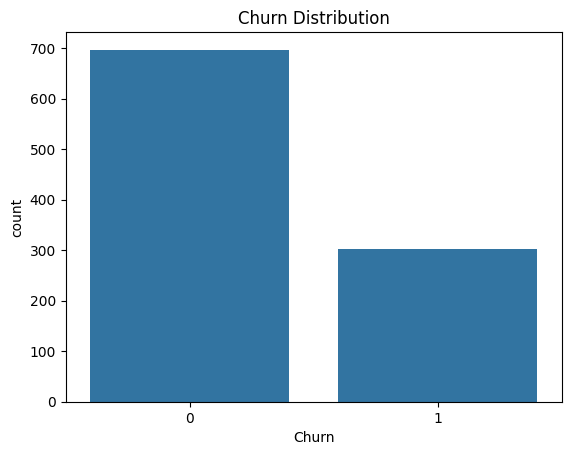

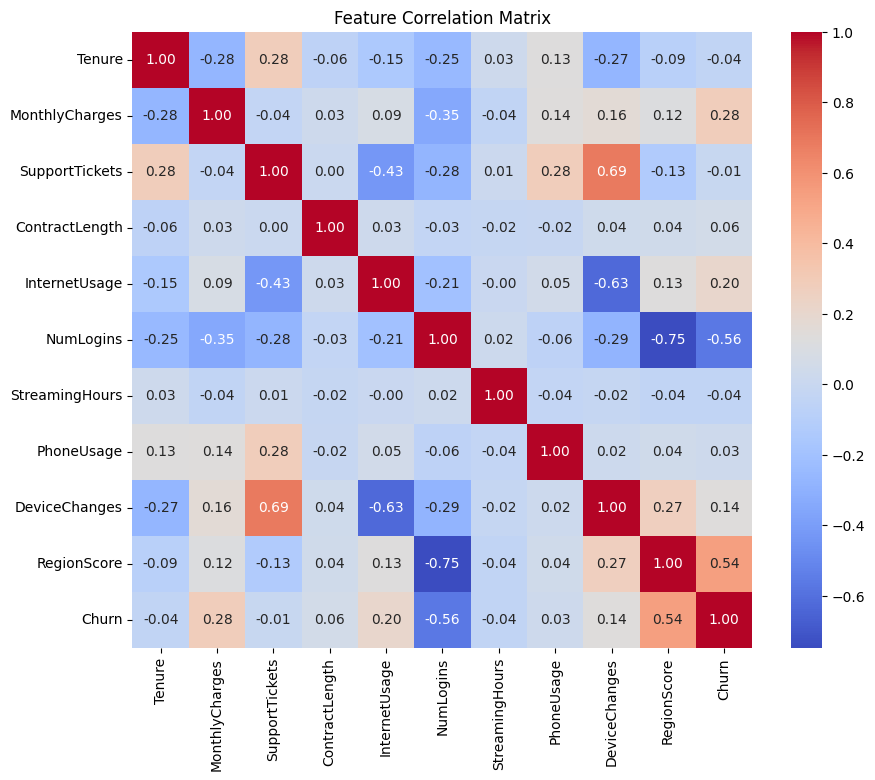

In [ ]:
# 4. Describe the data
print("Class balance (Churn):")
print(df["Churn"].value_counts(normalize=True))

print("\nSummary statistics:")
print(df.describe())

# 5. Visualize churn distribution
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

# 6. Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


# Build Predictive Neural Network and Show Results

### Summary of What This Section Does
In this section, we’ll build and train a feedforward neural network to predict customer churn based on behavioral features.  
The network will learn complex, non-linear relationships that simpler models might miss. We’ll:
1. Split the data into training and test sets.
2. Scale all numeric features.
3. Define and train a PyTorch neural network using binary cross-entropy loss.
4. Evaluate its performance on the test set using accuracy, precision, recall, F1-score, and ROC-AUC.
5. Visualize loss convergence and prediction quality.

This will give a sense of how well a neural model captures customer behavior compared to traditional models like logistic regression.


In [ ]:
# SECTION 2: Predictive Modeling with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1. Train-test split
X = df[feature_names].values
y = df["Churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# 2. Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 3. Define the model
class ChurnNN(nn.Module):
    def __init__(self):
        super(ChurnNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = ChurnNN()
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the model
epochs = 50
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/50, Loss: 0.6831
Epoch 20/50, Loss: 0.6674
Epoch 30/50, Loss: 0.6503
Epoch 40/50, Loss: 0.6296
Epoch 50/50, Loss: 0.5951


In [ ]:
# 5. Evaluate the model
model.eval()
with torch.no_grad():
    test_pred_probs = model(X_test_tensor)
    test_preds = (test_pred_probs >= 0.5).int().numpy()
    y_true = y_test_tensor.numpy()

print("\nClassification Report:")
print(classification_report(y_true, test_preds, target_names=["Not Churned", "Churned"]))



Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.85      0.88      0.86       139
     Churned       0.70      0.64      0.67        61

    accuracy                           0.81       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.80      0.81      0.80       200



## Review Questions

1. **How many samples and features are generated in the simulated churn dataset (`make_classification`)?**

   A. 500 samples and 8 features  
   B. 1000 samples and 10 features  
   C. 2000 samples and 12 features  
   D. 1000 samples and 6 features  

2. **What is the name of the target column added to the DataFrame that the model predicts?**

   A. `Churn`  
   B. `Cancelled`  
   C. `Target`  
   D. `Outcome`  

3. **Which of the following is one of the feature names used in the DataFrame?**

   A. `Age`  
   B. `Tenure`  
   C. `Income`  
   D. `ClicksPerDay`  

4. **What test set proportion is used in the train-test split?**

   A. 10%  
   B. 20%  
   C. 30%  
   D. 50%  

5. **Which model architecture matches the neural network defined in the notebook?**

   A. Linear(10→16) → ReLU → Linear(16→2) → Softmax  
   B. Linear(10→32) → ReLU → Dropout(0.3) → Linear(32→16) → ReLU → Linear(16→1) → Sigmoid  
   C. Conv1D → ReLU → MaxPool → Linear → Sigmoid  
   D. Linear(10→1) → Sigmoid only  

